In [1]:
import numpy as np
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score as acc
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
import kagglehub
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")

print("Path to dataset files:", path)

D:\anconda\envs\Nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ADITYA\.cache\kagglehub\datasets\kritanjalijain\amazon-reviews\versions\2


In [3]:
Fdata=pd.read_csv('C:\\Users\\ADITYA\\.cache\\kagglehub\\datasets\\kritanjalijain\\amazon-reviews\\versions\\2\\train.csv',header=None, names=['Polarity', 'Title', 'Review'])
Fdata.size


10800000

In [5]:
Fdata.Review[0]
data=Fdata[:500000]

In [6]:
data.loc[:, 'Full_review'] = data['Title'] + ' ' + data['Review']

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_25412\458153872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Full_review'] = data['Title'] + ' ' + data['Review']


In [7]:
data['cleaned_review'] = data['Full_review'].str.lower()

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_25412\382393118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_review'] = data['Full_review'].str.lower()


In [8]:
type(data['cleaned_review'][0])

str

In [9]:
def clean_html_special(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # keep only letters and spaces
    return text

data['cleaned_review'] = data['cleaned_review'].apply(clean_html_special)


C:\Users\ADITYA\AppData\Local\Temp\ipykernel_25412\3641519417.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_review'] = data['cleaned_review'].apply(clean_html_special)


In [10]:


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
important_words = {'not', 'no', "n't"}
stop_words = stop_words - important_words
def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

data['cleaned_review'] = data['cleaned_review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ADITYA\AppData\Local\Temp\ipykernel_25412\3557150750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_review'] = data['cleaned_review'].apply(remove_stopwords)


In [11]:

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

data['cleaned_review'] = data['cleaned_review'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\ADITYA\AppData\Local\Temp\ipykernel_25412\1465252368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_review'] = data['cleaned_review'].apply(lemmatize_text)


In [12]:

stemmer = PorterStemmer()

def stem_text(text):
    tokens = text.split()
    return ' '.join([stemmer.stem(word) for word in tokens])

# Uncomment if you prefer stemming:
data['cleaned_review'] = data['cleaned_review'].apply(stem_text)


C:\Users\ADITYA\AppData\Local\Temp\ipykernel_25412\3647765232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_review'] = data['cleaned_review'].apply(stem_text)


In [13]:
X_train,X_test,y_train,y_test=train_test_split(data.cleaned_review,data.Polarity,test_size=0.2,random_state=33,stratify=data.Polarity)

In [14]:
y_train.value_counts()

Polarity
2    202226
1    197774
Name: count, dtype: int64

In [15]:
clf=Pipeline([("vectorize",TfidfVectorizer()),
             ("LR",LogisticRegression())])
clf.fit(X_train,y_train)

D:\anconda\envs\Nlp_env\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('vectorize', ...), ('LR', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [16]:
y_pred=clf.predict(X_test)


In [17]:
cr=acc(y_test,y_pred)
cr

0.89754

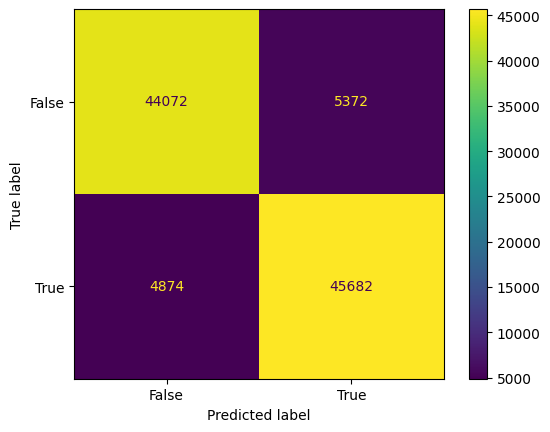

In [18]:

cm = confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()